In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels. tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pickle

In [2]:
df = pd.read_csv('stocks.csv') 

In [3]:
df['weaks'] = pd.to_datetime(df['weaks'], infer_datetime_format=True)
df.set_index('weaks', inplace = True)

In [4]:
train = df.iloc[:374]
test = df.iloc[375:]
print(len(test))

94


In [5]:
model1 = ExponentialSmoothing(train, trend='add', seasonal = 'add',seasonal_periods = 108)
fitted_model = model1.fit()
y_pred1 = fitted_model.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [6]:
print(mae(test,y_pred1))
print(mean_squared_error(test,y_pred1))
print(mean_absolute_percentage_error(test,y_pred1))

14.867377279505348
315.58177514603375
0.12002245234824492


Text(0, 0.5, 'STOCKS')

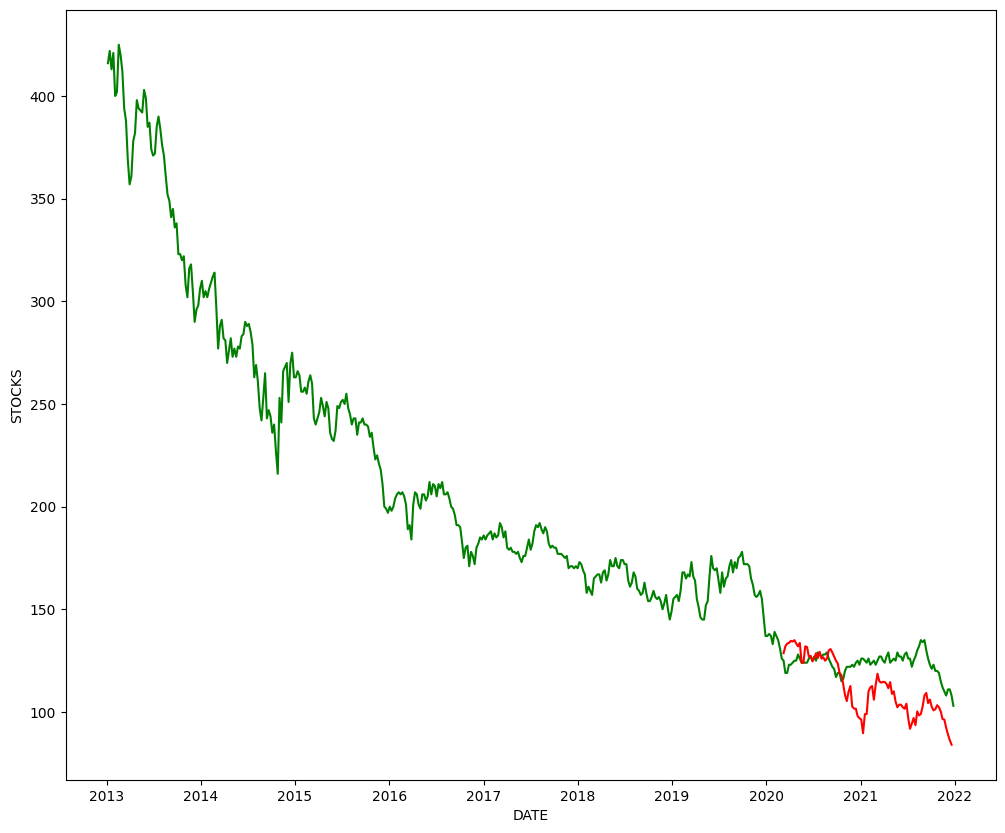

In [7]:
plt.figure(figsize =(12,10))
plt.plot(df['stocks'], color='green')  
plt.plot(y_pred1, color = 'red')
plt.xlabel("DATE") 
plt.ylabel("STOCKS")

In [8]:
model2 = SARIMAX(train, order=(1, 0, 1), seasonal_order=(1, 1, 0, 108))
model_fit = model2.fit()
y_pred2 = model_fit.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [9]:
print(mae(test,y_pred2))
print(mean_squared_error(test,y_pred2))
print(mean_absolute_percentage_error(test,y_pred2))

13.526086237686922
266.2235137848525
0.11224555149161254


Text(0, 0.5, 'STOCKS')

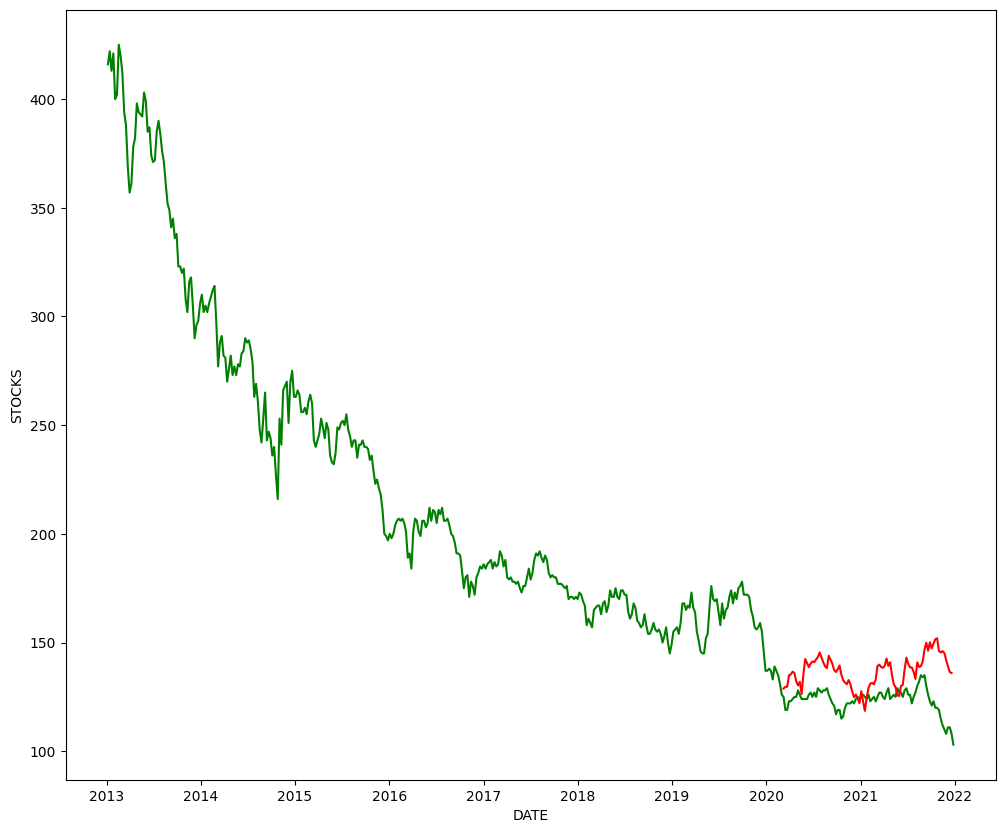

In [10]:
plt.figure(figsize =(12,10))
plt.plot(df['stocks'], color='green')  
plt.plot(y_pred2, color = 'red')
plt.xlabel("DATE") 
plt.ylabel("STOCKS")